# Visualizing uncertainty

![three-challenges](images/three-challenges.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})

## Let's make up three datasets of random numbers:
### A small one (10 observations), a medium one (100 observations), and a large one (1000 observations)

In [2]:
data_1 = np.random.randn(10) # 10 random values from the normal distribution (mean = 0, variance = 1)
data_2 = np.random.randn(100) # 100 random values from the normal distribution
data_3 = np.random.randn(1000) # 1000 random values from the normal distribution
data = [data_1,data_2,data_3] # A list of three random value datasets above
labels = ['n=%d' % len(x) for x in data] # A list of strings with the names 'n=10', 'n=100', and 'n=1000'

## A simple box and whisker plot, where:
### The *sample* median is shown with a line
### The *sample* interquartile range is shown with a box
### The *sample* limits of the data are shown with whiskers

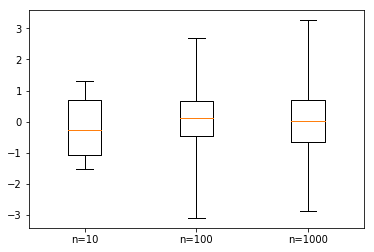

In [3]:
plt.boxplot(data,whis='range',labels=labels);

### Now add a notch whose width is related to our confidence in the location of the *population* median

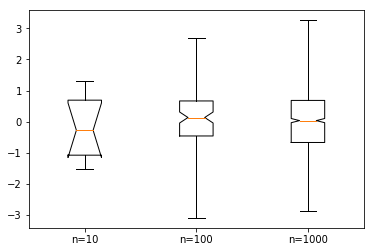

In [4]:
plt.boxplot(data,whis='range',notch=True,labels=labels);

## Finally show a scatter of the actual data points on top

In [5]:
def jitter_scatter(data):
    for i,data_i in enumerate(data): # For each of the three datasets
        x = i + 1 + 0.1*np.random.randn(len(data_i)) # Make up random x-values for the data points
        plt.scatter(x,data_i,alpha=0.3) # Plot the data values against those random x-values

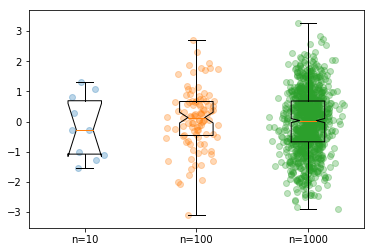

In [6]:
plt.boxplot(data,whis='range',notch=True,labels=labels);
jitter_scatter(data)

## We can also represent the uncertainty using a violin plot, showing us the where we see a lot of samples and where we don't see very many

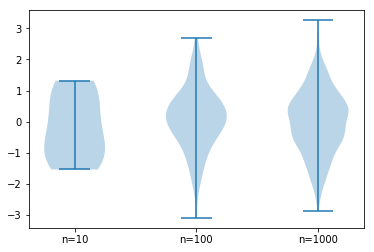

In [7]:
plt.violinplot(data);
plt.xticks([1,2,3],labels);

## The same thing can be done (even more easily) with dataframes

In [8]:
df = pd.DataFrame(data=np.random.randn(50,3),columns=['Group %s'%x for x in 'abc'])
df.head()

,Group a,Group b,Group c
0,-1.064496,-0.080570,-0.490685
1,-0.097917,1.379999,-0.616479
2,-0.057255,-0.643417,0.004766
3,-0.217157,-0.370122,-0.053477
4,-0.025262,-0.548540,2.310472


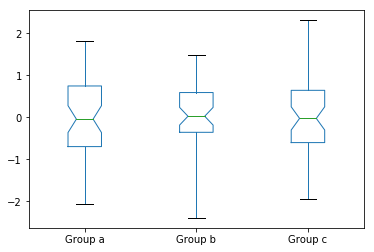

In [9]:
df.plot.box(whis='range',notch=True)

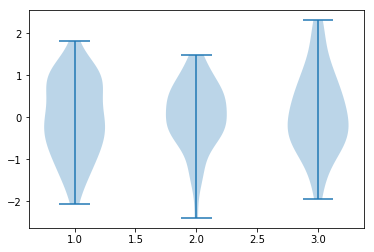

In [10]:
plt.violinplot(df.T);

## Even better, use Seaborn (based on Matplotlib) to make even more beautiful violin plots

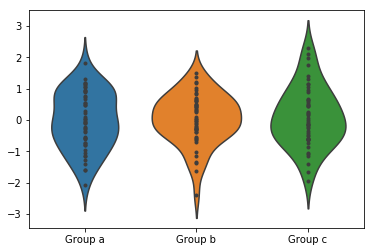

In [11]:
import seaborn as sns
sns.violinplot(data=df,inner='point');

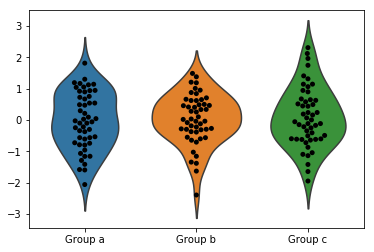

In [12]:
sns.violinplot(data=df,inner=None)
sns.swarmplot(data=df,color='black');